# name:Dor Oriya Id:314641259

Fetch MNIST dataset

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd

mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

X = X.to_numpy()    # convert X to a numpy
y = y.astype(int)   # convert y to an integer

NUM_OF_CLASSES = 10
CHECK_INTERMEDIATE_RESULTS = 100

# Use train_test_split to divide the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# normalized the data 
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Flattening Images + adding the bias (The first component of this vector represents the bias term and is set to 1)
X_train_flattened = np.hstack([np.ones((X_train_normalized.shape[0], 1)), X_train_normalized])
# One-Hot Vector Representation
y_train_one_hot = np.eye(NUM_OF_CLASSES)[y_train]
# Flattening, One-Hot Vector for test set
X_test_flattened = np.hstack([np.ones((X_test_normalized.shape[0], 1)), X_test_normalized])
y_test_one_hot = np.eye(NUM_OF_CLASSES)[y_test]

FETCHER = X_train_flattened[0].size

# standard deviation
sd = 0.01
W_pocket = np.random.randn(X_train_flattened.shape[1], NUM_OF_CLASSES) * sd
W_softmax = np.random.randn(X_train_flattened.shape[1], NUM_OF_CLASSES) * sd
W_linear_regression = np.random.randn(X_train_flattened.shape[1], NUM_OF_CLASSES) * sd
# if we use X_train_flattened.shape[0] is incorrect because we take the number of sample,
# but we need the number of features(row/col)

 we use MNIST dataset with perceptron/poket algorithm to predict any digit compare the other digits
 we're flattening the image, add the bias and use any pixel as fetcher and use poket algorithm with chosen T
 to choose the best weights with limits of time(T)
 after we do this we can predict the digit when we check which number has more likelihood to be in the picture
 between all the digits(highest confidence score: argmax of y=0,...,9 (w(y)^T*X))

In [2]:
# Perceptron Learning Algorithm
# Binary Classification Setup
def binary_classifier(x_train, labels, w_0_root):
    y_binary_class = np.where(labels[:, 0] == 1, 1, -1)
    final_hypothesis = False
    w_x = np.dot(x_train, w_0_root)
    e_in = np.sum(np.sign(w_x) != y_binary_class)
    miss_set = np.where(np.sign(w_x) != y_binary_class)[0]
    while not final_hypothesis:
        final_hypothesis = True
        if e_in != 0:
            random_index = random.choice(miss_set)
            w_0_root += y_binary_class[random_index] * x_train[random_index]
            w_x = np.dot(x_train, w_0_root)
            miss_set = np.where(np.sign(w_x) != y_binary_class)[0]
            final_hypothesis = False
            e_in = np.sum(np.sign(w_x) != y_binary_class)
    return w_0_root


# Iterative Binary Problems
def iterative_binary_classifier(x_train, labels):
    w_i_root = np.zeros((x_train[0].size, NUM_OF_CLASSES))
    for c in range(1, NUM_OF_CLASSES):
        w_k_root = np.zeros((x_train[0].size, 1))  # create a 785x1 array filled with zeros
        y_binary_class = np.where(labels[:, c] == 1, 1, -1)
        w_x = np.dot(x_train, w_k_root)
        e_in = np.sum(np.sign(w_x) != y_binary_class)
        final_hypothesis = False
        miss_set = np.where(np.sign(w_x) != y_binary_class)[0]  # make list of index that fulfill the condition
        while not final_hypothesis:
            final_hypothesis = True
            if e_in != 0:
                random_index = random.choice(miss_set)
                w_k_root += y_binary_class[random_index] * x_train[random_index]
                w_x = np.dot(x_train, w_k_root)
                miss_set = np.where(np.sign(w_x) != y_binary_class)[0]
                final_hypothesis = False
                e_in = np.sum(np.sign(w_x) != y_binary_class)
        w_i_root[:, c] = w_k_root
    return w_i_root


# pocket algorithm
def pocket(x_train, weight, labels, n, times, require_length):
    save_e_in = []
    w_roof_root = weight.copy()
    w_t_root = w_roof_root.copy()
    w_x = np.dot(x_train, weight)
    y_binary = np.where(labels[:, n] == 1, 1, -1)
    miss_set = np.where(np.sign(w_x) != y_binary)[0]  # make list of index that fulfill the condition
    e_in = np.sum(np.sign(w_x) != y_binary)
    save_e_in.append(e_in)
    for t in tqdm(range(times)):          
        if e_in != 0:
            random_index = random.choice(miss_set)
            w_t_root += y_binary[random_index] * x_train[random_index]
            w_x = np.dot(x_train, w_t_root)
            miss_set = np.where(np.sign(w_x) != y_binary)[0]
            # calc the E in of the w(t+1)
            e_in_t = np.sum(np.sign(w_x) != y_binary)
            if e_in_t < e_in:
                e_in = e_in_t
                w_roof_root = w_t_root
            else:
                w_t_root = w_roof_root
        else:
            break
        if (t + 1) % CHECK_INTERMEDIATE_RESULTS == 0:
            save_e_in.append(e_in)
    if len(save_e_in) < require_length:
        save_e_in.append(e_in)
    return w_roof_root, np.array(save_e_in)


# predict - the number the pocket algorithm choose
def predict_pocket(x_text, weight):
    w_x_text = np.dot(x_text, weight)
    return np.argmax(w_x_text, axis=1)

 run the pocket algorithm and plot the E_in after every 100 iteration of any class(class k is mean identify digit k compare to other digits)

 22%|██▏       | 216/1000 [00:03<00:14, 55.14it/s]

100%|██████████| 10/10 [03:03<00:00, 18.36s/it]


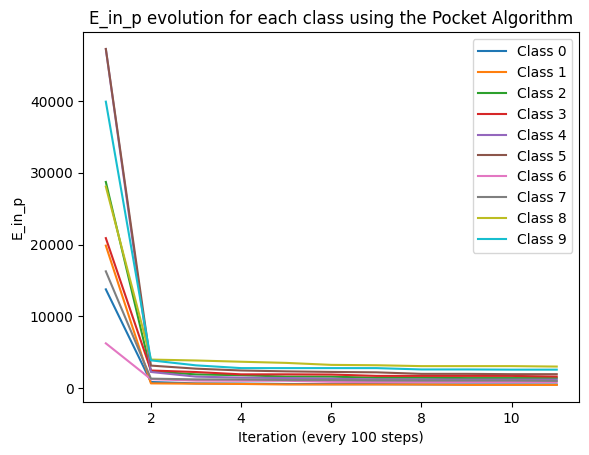

In [15]:
# calc the w root 0,...,9 with poket algorithm(MNIST is not linearly separable)
times_to_run = 1000 # I chose 1000 as a variable by trial and error(try 100,200,400,500,1000,1500,2000) 
required_length = (times_to_run // CHECK_INTERMEDIATE_RESULTS) + 1
E_in_p = np.zeros((required_length, NUM_OF_CLASSES))  
for i in tqdm(range(NUM_OF_CLASSES)):
    W_pocket[:, i], E_in_p[:, i] = pocket(X_train_flattened, W_pocket[:, i], y_train_one_hot, i,
                                 times=times_to_run, require_length=required_length)
    
    plt.plot(range(1, required_length + 1), E_in_p[:, i], label=f'Class {i}')

plt.xlabel('Iteration (every 100 steps)')
plt.ylabel('E_in_p')
plt.title('E_in_p evolution for each class using the Pocket Algorithm')
plt.legend()    # Automatic detection of elements to be shown in the legend
plt.show()

 function for all the algorithm that calculate the confusion matrix

In [8]:
# build the confusion matrix for the multi-class on the test data
def confusion_matrix(y_true, y_pred, num_classes):
    # Initialize TP, TN, FP, FN for each class
    tp = np.zeros(num_classes)
    tn = np.zeros(num_classes)
    fp = np.zeros(num_classes)
    fn = np.zeros(num_classes)
    accuracy = np.zeros(num_classes)
    true_positives = np.zeros(num_classes)
    true_negatives = np.zeros(num_classes)
    for c in range(num_classes):
        tp[c] = np.sum((y_true == c) & (y_pred == c))   # & equals to 'and' condition

        tn[c] = np.sum((y_true != c) & (y_pred != c))

        fp[c] = np.sum((y_true != c) & (y_pred == c))

        fn[c] = np.sum((y_true == c) & (y_pred != c))

    for c in range(num_classes):
        accuracy[c] = (tp[c] + tn[c]) / (tp[c] + tn[c] + fp[c] + fn[c]) if (tp[c] + tn[c] + fp[c] + fn[c]) != 0 else 0
        true_positives[c] = tp[c] / (tp[c] + fn[c]) if (tp[c] + fn[c]) != 0 else 0
        true_negatives[c] = tn[c] / (tn[c] + fp[c]) if (tn[c] + fp[c]) != 0 else 0
    return accuracy, true_positives, true_negatives

def show_the_data(acc, tpr, tnr, y_test_predict):
    data = {
    'Digit': list(range(NUM_OF_CLASSES)),
    'Accuracy (ACC)': acc,  # Per-digit ACC if available, otherwise omit averaging
    'True Positive Rate (TPR)': tpr,
    'True Negative Rate (TNR)': tnr
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    print(df)
    
    # Calculate accuracy
    model_accuracy = np.mean(y_test_predict == y_test)
    print(f'Multi-Class Classification Accuracy of pocket algorithm: {model_accuracy:.4f}')

 show the confusion matrix and total accuracy of the pocket algorithm

In [16]:
# Predict on test data
y_test_predict_pocket = predict_pocket(X_test_flattened, W_pocket)
ACC_p, TPR_p, TNR_p = confusion_matrix(y_test, y_test_predict_pocket, NUM_OF_CLASSES)
show_the_data(ACC_p, TPR_p, TNR_p, y_test_predict_pocket)

   Digit  Accuracy (ACC)  True Positive Rate (TPR)  True Negative Rate (TNR)
0      0          0.9920                  0.956256                  0.995897
1      1          0.9873                  0.968750                  0.989715
2      2          0.9740                  0.908997                  0.980959
3      3          0.9689                  0.871373                  0.980147
4      4          0.9737                  0.753863                  0.995601
5      5          0.9641                  0.710779                  0.990290
6      6          0.9861                  0.914672                  0.993694
7      7          0.9739                  0.940284                  0.977865
8      8          0.9589                  0.782250                  0.977854
9      9          0.9633                  0.865830                  0.974565
Multi-Class Classification Accuracy of pocket algorithm: 0.8711


Part-A discussion: In my solution I can see that the algorithm choose a good separator but not the best(SVM,it could be the best but the chances are low) 
because has a digits that very equals each other that with linear separator it's very hard to choose the best linear separator 
especially when we use pocket/perceptron algorithm. In the E_in graph we can saw that after 200 iteration we get a low improvement of the E_in 
at every iteration.

 we use MNIST dataset with Softmax Regression algorithm to predict any digit compare the other digits
 we're flattening the image, add the bias and use any pixel as fetcher and use Softmax algorithm with chosen T
 to choose the best weights with limits of iteration on the gradient descent
 after we do this we can predict the digit when we check which number has more likelihood to be in the picture
 between all the digits(highest confidence score: argmax of y=0,...,9 (hypothesis)

In [18]:
# calc the hypothesis of k
def hypothesis(k_estimated):
    estimated = np.exp(k_estimated - np.max(k_estimated, axis=1, keepdims=True))
    probability = estimated / np.sum(estimated, axis=1, keepdims=True)
    return probability

# E_in define as:
def e_in_softmax(y_true, y_roof):
    return -np.sum(y_true * np.log(y_roof + 1e-10))  # add epsilon for numerical stability

def gradient_descent(eta, max_iteration, weight, require_length):
    save_e_in = []
    w_x = np.dot(X_train_flattened, weight)
    y_roof = hypothesis(w_x)
    save_e_in.append(e_in_softmax(y_train_one_hot, y_roof))
    # stop condition 1 (choose max iteration)
    for t in tqdm(range(max_iteration)):
        w_x = np.dot(X_train_flattened, weight)

        y_roof = hypothesis(w_x)
        
        # Compute gradients like I explain in the file "extend"
        gradient = np.dot(X_train_flattened.T, (y_roof - y_train_one_hot))

        # Update weights (explain in the class)
        weight -= eta * gradient

        # stop condition 2 
        # threshold choose as a starting threshold to check the algorithm
        threshold = 0.01
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm < threshold:
            break

        if (t + 1) % CHECK_INTERMEDIATE_RESULTS == 0:
            save_e_in.append(e_in_softmax(y_train_one_hot, y_roof))
    if len(save_e_in) < require_length:
        save_e_in.append(e_in_softmax(y_train_one_hot, y_roof))    
        
    return weight, np.array(save_e_in)

# predict of the softmax algorithm value on the test data set
def predict_softmax(x_text, weight):
    w_x_text = np.dot(x_text, weight)
    y_roof_text = hypothesis(w_x_text)
    return np.argmax(y_roof_text, axis=1)


 run the softmax algorithm and plot the E_in after every 100 iteration of any class(class k is mean identify digit k compare to other digits)
 notice--> if I use more than one in this algorithm. W_softmax is global variable so the weight start close to minimum  

100%|██████████| 1000/1000 [02:13<00:00,  7.51it/s]


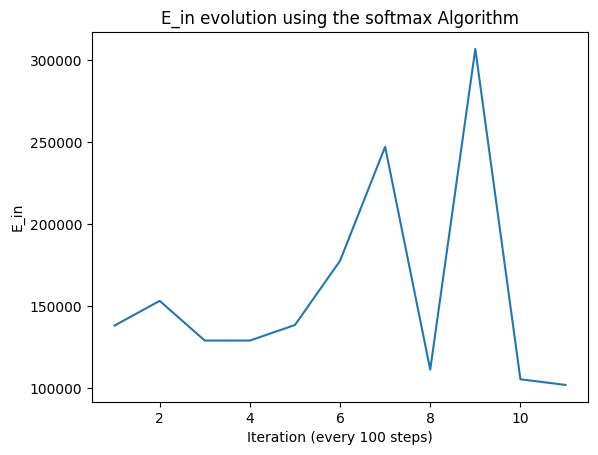

In [19]:
iteration = 1000    # I chose 1000 as a variable by trial and error(try 100,200,500,1500,2000)
required_length = (iteration // CHECK_INTERMEDIATE_RESULTS) + 1
# update the weight by gradient descent
# eta chose by rule of thumb
W_softmax, E_in_s= gradient_descent(eta=0.1, max_iteration=iteration, weight=W_softmax, require_length=required_length)

plt.plot(range(1, required_length + 1), E_in_s)
plt.xlabel('Iteration (every 100 steps)')
plt.ylabel('E_in')
plt.title('E_in evolution using the softmax Algorithm')
plt.show()

show the confusion matrix and total accuracy of the softmax algorithm

In [20]:
# Predict on test data
y_test_predict_softmax = predict_softmax(X_test_flattened, W_softmax)
ACC_s, TPR_s, TNR_s = confusion_matrix(y_test, y_test_predict_softmax, NUM_OF_CLASSES)
show_the_data(ACC_s, TPR_s, TNR_s, y_test_predict_softmax)

   Digit  Accuracy (ACC)  True Positive Rate (TPR)  True Negative Rate (TNR)
0      0          0.9925                  0.955239                  0.996562
1      1          0.9907                  0.961806                  0.994462
2      2          0.9800                  0.914168                  0.987047
3      3          0.9758                  0.892650                  0.985389
4      4          0.9849                  0.917219                  0.991643
5      5          0.9747                  0.879402                  0.984553
6      6          0.9890                  0.940687                  0.994137
7      7          0.9852                  0.934597                  0.991168
8      8          0.9757                  0.843137                  0.989924
9      9          0.9797                  0.892857                  0.989737
Multi-Class Classification Accuracy of pocket algorithm: 0.9141


Part-B discussion: In my solution I can see that the algorithm converge to weight that give high probability to choose the right digit.
It's because softmax regression is an algorithm that generalization of logistic regression to the case where we want to handle multiple classes(our case).
In the E_in graph we can saw that after 200 iteration we get a low improvement of the E_in 
at every iteration and even some raising this is probably because we are approaching the local minimum (we cannot know that it is the global minimum, the function is not convex).

 we use MNIST dataset with linear regression algorithm to predict any digit compare the other digits
 we're flattening the image, add the bias and use any pixel as fetcher and use linear regression algorithm# to choose the best weights
 after we do this we can predict the digit when we check which number has more likelihood to be in the picture
 between all the digits(highest confidence score: argmax of y=0,...,9 (w(y)^T*X))

In [21]:
#  the gradient of the E_in compare to zero(convex function that give global minimum)
def linear_regression(x_train, labels):
    x_t = x_train.T
    x_t_x = np.dot(x_t, x_train)
    # pinv returns the inverse of the matrix when it is available and the pseudo inverse when it isn't.
    pinv = np.linalg.pinv(x_t_x)
    w_roof = np.dot(np.dot(pinv, x_train.T), labels)    # (X^TX)^-1X^Ty
    return w_roof

# predict - the number the algorithm choose
def predict_linear_regression(x_text, weight, labels):
    w_x_text = np.dot(x_text, weight)
    return np.argmax(w_x_text, axis=1)

 run the linear regression algorithm

In [22]:
# calc the w root 0,...,9 with linear regression algorithm
W_linear_regression = linear_regression(X_train_flattened, y_train_one_hot)

 show the confusion matrix and total accuracy of the linear regression algorithm

In [23]:
# show the confusion matrix and total accuracy of the linear regression algorithm
# Predict on test data
y_test_predict_linear_regression = predict_softmax(X_test_flattened, W_linear_regression)
ACC_l, TPR_l, TNR_l = confusion_matrix(y_test, y_test_predict_linear_regression, NUM_OF_CLASSES)
show_the_data(ACC_l, TPR_l, TNR_l, y_test_predict_linear_regression)

   Digit  Accuracy (ACC)  True Positive Rate (TPR)  True Negative Rate (TNR)
0      0          0.9854                  0.951170                  0.989132
1      1          0.9700                  0.973090                  0.969598
2      2          0.9722                  0.806618                  0.989926
3      3          0.9639                  0.836557                  0.978586
4      4          0.9693                  0.879691                  0.978227
5      5          0.9647                  0.727855                  0.989187
6      6          0.9810                  0.919875                  0.987499
7      7          0.9724                  0.859716                  0.985690
8      8          0.9601                  0.722394                  0.985605
9      9          0.9636                  0.812741                  0.981035
Multi-Class Classification Accuracy of pocket algorithm: 0.8513


Part-C discussion and compare: In my solution I can see that the algorithm converge to weight that give good probability to choose the right digit.
it's because has linear relationship between the image to the number but this not strong relationship(different hand write).
we always get the same result because our hypothesis it's depend on the linear relationship that always the same. The algorithm is very 
easy to implement and the result compare to the perceptron are about the same, even the same digits get high probability to predict(0,1).
The result compare to the softmax regression less stable(some digits predict with high probability and some medium low)
